# Проект: Анализ оттока клиентов

## Описание
Предоставлены данные о клиентах регионального банка "Метанпромбанк". Необходимо провести анализ оттока клиентов и составить портрет склонных уходить из банка клиентов.

### Ход исследования:
 1. Загрузка необходимых библиотек и датасета, первичное ознакомление с данными
 2. Предобработка данных: изучение дубликатов, пропусков, выбросов, дополнительная категоризация
 3. Исследовательский анализ данных: поиск взаимосвязей, вычисление корреляции
 4. Анализ оттока: создание портрета склонных уходить клиентов - город, пол, возраст и т.д
 5. Статистический анализ данных: формулировка гипотез и их проверка
 6. Выводы и рекомендации.

## Первичное ознакомление с данными

In [1]:
# Подключение библиотек
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_palette('pastel') 
from scipy import stats as st

In [2]:
data=pd.read_csv('/datasets/bank_dataset.csv')
data

,userid,score,City,Gender,Age,Objects,Balance,Products,CreditCard,Loyalty,estimated_salary,Churn
0,15677338,619,Ярославль,Ж,42,2,NaN,1,1,1,101348.88,1
1,15690047,608,Рыбинск,Ж,41,1,83807.86,1,0,1,112542.58,0
2,15662040,502,Ярославль,Ж,42,8,159660.80,3,1,0,113931.57,1
3,15744090,699,Ярославль,Ж,39,1,NaN,2,0,0,93826.63,0
4,15780624,850,Рыбинск,Ж,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,15648965,771,Ярославль,М,39,5,NaN,2,1,0,96270.64,0
9996,15612628,516,Ярославль,М,35,10,57369.61,1,1,1,101699.77,0
9997,15627268,709,Ярославль,Ж,36,7,NaN,1,0,1,42085.58,1
9998,15725091,772,Ростов Великий,М,42,3,75075.31,2,1,0,92888.52,1


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   userid            10000 non-null  int64  
 1   score             10000 non-null  int64  
 2   City              10000 non-null  object 
 3   Gender            10000 non-null  object 
 4   Age               10000 non-null  int64  
 5   Objects           10000 non-null  int64  
 6   Balance           6383 non-null   float64
 7   Products          10000 non-null  int64  
 8   CreditCard        10000 non-null  int64  
 9   Loyalty           10000 non-null  int64  
 10  estimated_salary  10000 non-null  float64
 11  Churn             10000 non-null  int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 937.6+ KB


Итак, у нас 11 колонок, 1000 строк, пропуски есть только в Balance. Типы объектов выглядят правильно, здесь менять ничего не будем. Для удобства переименуем столбцы в cоответствии со стилем snake. 

## Предобработка данных

### Названия столбцов

In [4]:
#Переименуем столбцы
data.columns= data.columns.str.lower()
data.rename(columns={'userid': 'user_id', 'creditcard':'credit_card'}, inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   user_id           10000 non-null  int64  
 1   score             10000 non-null  int64  
 2   city              10000 non-null  object 
 3   gender            10000 non-null  object 
 4   age               10000 non-null  int64  
 5   objects           10000 non-null  int64  
 6   balance           6383 non-null   float64
 7   products          10000 non-null  int64  
 8   credit_card       10000 non-null  int64  
 9   loyalty           10000 non-null  int64  
 10  estimated_salary  10000 non-null  float64
 11  churn             10000 non-null  int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 937.6+ KB


Вывод: названия столбцов приведены к стилю snake

### Аномалии и выбросы

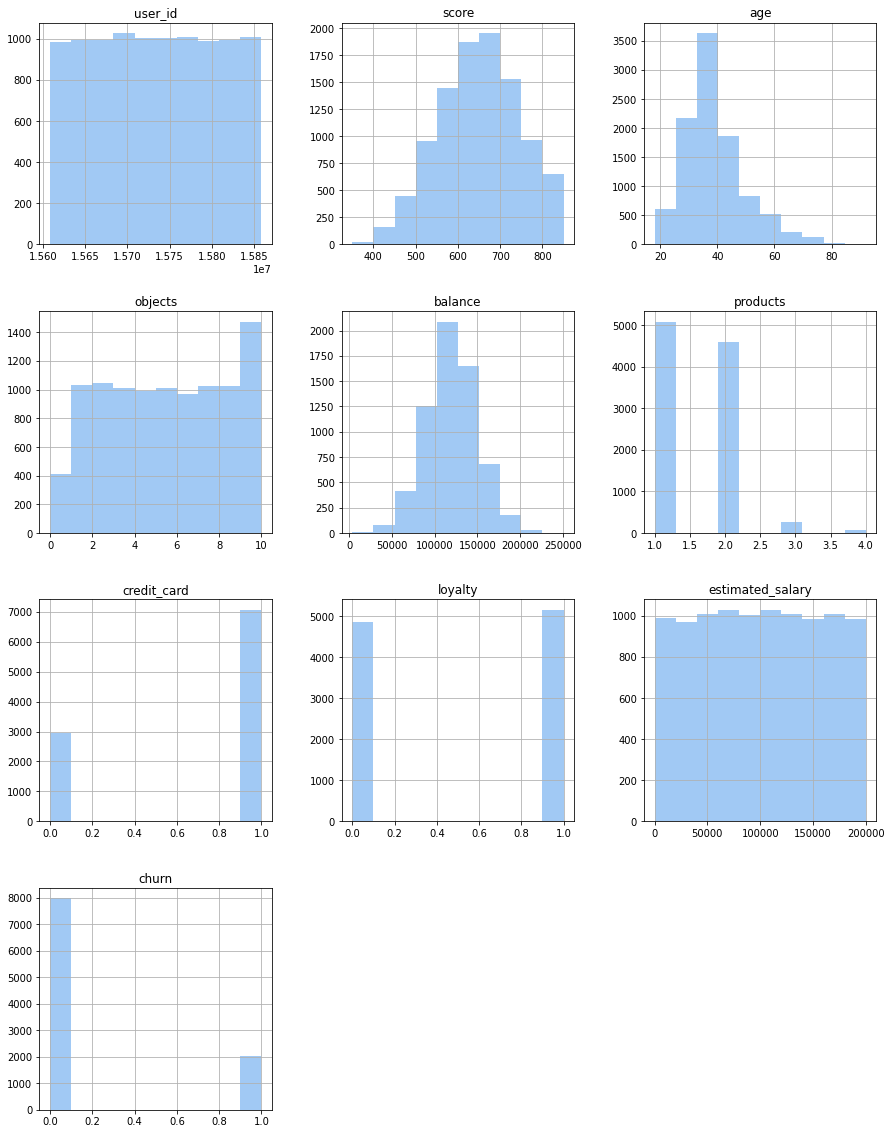

In [5]:
data.hist(figsize=(15, 20))
plt.show()

In [6]:
print("Варианты пола: ", data['gender'].unique())
print("Варианты городов: ", data['city'].unique())

Варианты пола:  ['Ж' 'М']
Варианты городов:  ['Ярославль' 'Рыбинск' 'Ростов Великий']


Вывод: Выбросов и аномальных данных не обнаружено. 

### Анализ пропусков

In [7]:
#Выделим данные с пропусками в отдельную таблицу
no_balance=data.query('balance.isna()')
no_balance

,user_id,score,city,gender,age,objects,balance,products,credit_card,loyalty,estimated_salary,churn
0,15677338,619,Ярославль,Ж,42,2,NaN,1,1,1,101348.88,1
3,15744090,699,Ярославль,Ж,39,1,NaN,2,0,0,93826.63,0
6,15635267,822,Ярославль,М,50,7,NaN,2,1,1,10062.80,0
11,15779909,497,Рыбинск,М,24,3,NaN,2,1,0,76390.01,0
12,15675000,476,Ярославль,Ж,34,10,NaN,2,1,0,26260.98,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9989,15648358,841,Рыбинск,М,28,4,NaN,2,1,1,179436.60,0
9992,15699841,726,Рыбинск,М,36,2,NaN,1,1,0,195192.40,0
9994,15762030,800,Ярославль,Ж,29,2,NaN,2,0,0,167773.55,0
9995,15648965,771,Ярославль,М,39,5,NaN,2,1,0,96270.64,0


In [8]:
#Проверим распределение пропусков по признаку пола:
gender_isna = no_balance.pivot_table(index='gender',values='products',aggfunc='count').reset_index()
gender_isna
#Значимых различий нет.

,gender,products
0,Ж,1654
1,М,1963


In [9]:
#Проверим распределение пропусков по признаку географии:
city_isna = no_balance.pivot_table(index='city',values='products',aggfunc='count').reset_index()
city_isna
# В Ярославле пропуски в balance встречаются в 2 раза чаще. Интересно, что в Ростове при этом пропусков нет вообще.

,city,products
0,Рыбинск,1199
1,Ярославль,2418


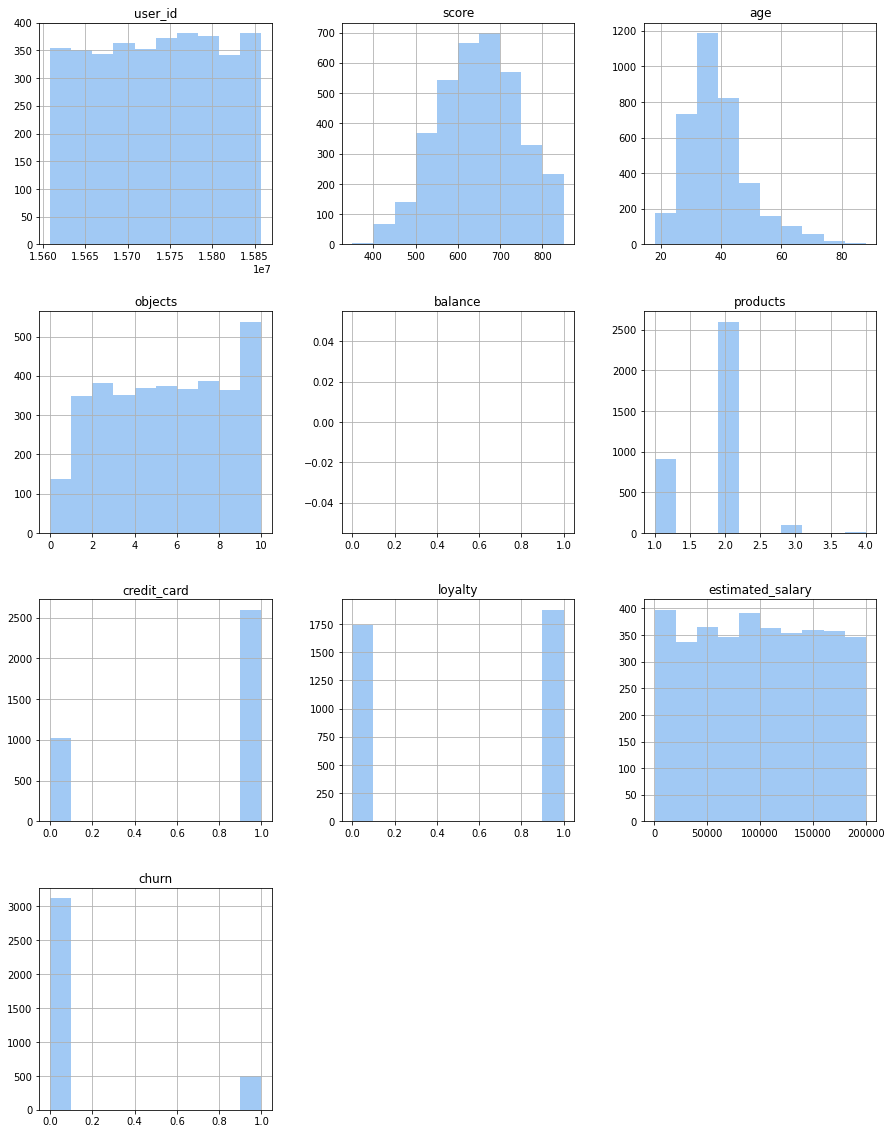

In [10]:
#Проверим распределение пропусков по "Числовым" признакам
no_balance.hist(figsize=(15, 20))
plt.show()

Значимых различий по зарплате, активности и количеству объектов в собственности клиентов не наблюдается.
Из графиков можно видеть, что пропуск в значении Balance: 
- Чаще всего встречается у тех, кто пользуется 2 продуктами (примерно в 2.5 раза больше, чем у пользующихся 1 продуктом, и больше чем в 10  раз, чем у пользующихся тремя). 
- Примерно в 2.5 раза чаще у клиентов с кредитной карточкой, чем без. 
- Чаще всего у клиентов около 30 лет
- Как ни странно, но оставшихся клиентов с пропуском в балансе в 6 раз больше, чем ушедших.

In [11]:
#Проверим, есть ли в датасете клиенты с нулевым балансом
data['balance'].describe()

count      6383.000000
mean     119827.493793
std       30095.056462
min        3768.690000
25%      100181.975000
50%      119839.690000
75%      139512.290000
max      250898.090000
Name: balance, dtype: float64

Итак, можно видеть, что нет клиентов, у которых на счету было бы меньше 3.7к рублей. 
Предположу, что пропуск в cтолбце balance означает нулевой дебетовый счёт. Это может быть связано, например, с тем, что клиент пользуется только кредитной картой/выплачивает банку кредит или ипотеку.

Вывод: разумнее всего будет оставить пропуски как  есть, т.к точную причину их появления установить не удаётся. Имеет смысл связаться с заказчиком и уточнить этот момент.

### Проверка дубликатов

In [12]:
data.duplicated().sum()

0

In [13]:
data['user_id'].duplicated().sum()

0

Вывод: дубликатов не обнаружено

### Дополнительная категоризация

In [14]:
data['age'].describe()

count    10000.000000
mean        38.921800
std         10.487806
min         18.000000
25%         32.000000
50%         37.000000
75%         44.000000
max         92.000000
Name: age, dtype: float64

In [15]:
#Проведём дополнительную категоризацию по возрасту
def age_category(row): #Функция, определяющая категорию возраста
    age = row['age']
    if age <=25:
        category='junior'    
    elif age <=50:
        category='middle'       
    else:
        category='senior'    
    return category
data['age_category']=data.apply(age_category, axis=1)
data.sort_values(by='age').head(10)
data.sort_values(by='age').tail(10)
data

,user_id,score,city,gender,age,objects,balance,products,credit_card,loyalty,estimated_salary,churn,age_category
0,15677338,619,Ярославль,Ж,42,2,NaN,1,1,1,101348.88,1,middle
1,15690047,608,Рыбинск,Ж,41,1,83807.86,1,0,1,112542.58,0,middle
2,15662040,502,Ярославль,Ж,42,8,159660.80,3,1,0,113931.57,1,middle
3,15744090,699,Ярославль,Ж,39,1,NaN,2,0,0,93826.63,0,middle
4,15780624,850,Рыбинск,Ж,43,2,125510.82,1,1,1,79084.10,0,middle
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,15648965,771,Ярославль,М,39,5,NaN,2,1,0,96270.64,0,middle
9996,15612628,516,Ярославль,М,35,10,57369.61,1,1,1,101699.77,0,middle
9997,15627268,709,Ярославль,Ж,36,7,NaN,1,0,1,42085.58,1,middle
9998,15725091,772,Ростов Великий,М,42,3,75075.31,2,1,0,92888.52,1,middle


In [16]:
data['estimated_salary'].describe()

count     10000.000000
mean     100090.239881
std       57510.492818
min          11.580000
25%       51002.110000
50%      100193.915000
75%      149388.247500
max      199992.480000
Name: estimated_salary, dtype: float64

In [17]:
def salary_category(row): #Функция, определяющая категорию дохода
    money = row['estimated_salary']
    if money <=30000:
        category='E'    
    elif money <=50000:
        category='D'    
    elif money <=100000:
        category='C'  
    elif money <=150000:
        category='B'    
    else:
        category='A'    
    return category    
    return category
data['salary_category']=data.apply(salary_category, axis=1)
#data.sort_values(by='estimated_salary').head(10)
data.sort_values(by='estimated_salary').tail(10)


,user_id,score,city,gender,age,objects,balance,products,credit_card,loyalty,estimated_salary,churn,age_category,salary_category
6125,15730649,501,Ростов Великий,Ж,34,7,93244.42,1,0,1,199805.63,0,middle,A
8088,15858392,541,Ростов Великий,Ж,39,9,100116.67,1,1,1,199808.10,1,middle,A
6402,15846947,719,Ярославль,М,36,3,155423.17,1,1,1,199841.32,0,middle,A
1378,15725570,715,Рыбинск,Ж,35,4,40169.88,2,1,1,199857.47,0,middle,A
5958,15784455,540,Ярославль,Ж,40,3,165298.12,1,0,1,199862.75,0,middle,A
8926,15751872,620,Ярославль,М,28,8,NaN,2,1,1,199909.32,0,middle,A
9096,15805067,569,Ярославль,М,37,9,178755.84,1,1,0,199929.17,0,middle,A
4417,15740006,608,Рыбинск,М,27,4,153325.10,1,1,1,199953.33,0,middle,A
3580,15677095,639,Ростов Великий,Ж,41,5,98635.77,1,1,0,199970.74,0,middle,A
6646,15704757,685,Рыбинск,Ж,42,2,NaN,2,0,0,199992.48,0,middle,A


### Вывод по предобработке
В результате предобработки данных:
- Столбцы переименованы в соответствии со стилем snake
- Выбросов и аномальных данных не обнаружено
- Дубликатов не обнаружено
- Обнаружены и обработаны пропуски в столбце Balance. Пропуск: 

  * Чаще всего встречается у тех, кто пользуется 2 продуктами (примерно в 2.5 раза больше, чем у пользующихся 1 продуктом, и больше чем в 10  раз, чем у пользующихся тремя)
  * Примерно в 2.5 раза чаще у клиентов с кредитной карточкой, чем без. 
  * Чаще всего у клиентов около 30 лет
  * Оставшихся клиентов с пропуском в балансе в 6 раз больше, чем ушедших.
  * Значимых различий в возрасте, поле,  активности и количеству объектов в собственности клиентов не обнаружено
  * В Ярославле встречается в 2 раза чаще, чем в Рыбинске. Интересно, что в Ростове при этом пропусков нет вообще.
  
  Предположительно пропуск в cтолбце balance означает нулевой дебетовый счёт. Это может быть связано, например, с тем, что клиент пользуется только кредитной картой/выплачивает банку кредит или ипотеку. Принято решение оставить пропуски как есть, т.к точную причину их появления установить не удаётся. Имеет смысл связаться с заказчиком и уточнить этот момент.
  
  
- Проведена дополнительная категоризация. Клиентам от 18 (минимальный возраст) до 25 присвоена категория junior, от 26 до 45 - middle, более 45 - senior.

## Исследовательский анализ данных

### Общий анализ
Посмотрим, нельзя ли обнаружить взаимосвязь между какими-либо параметрами и проверим распределение по различным признакам. Часть гистограмм была построена на этапе предобработки, но повторим их для наглядности и аккуратности.  Также построим матрицу корреляций.

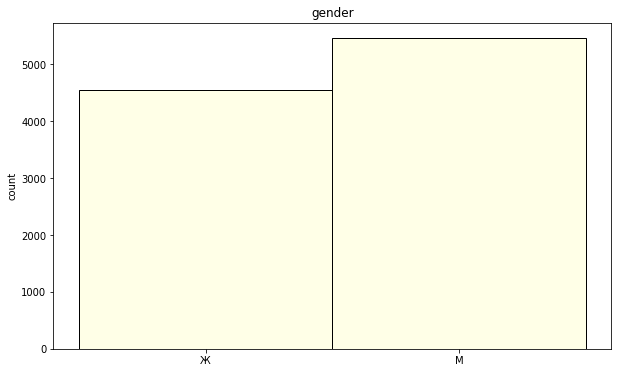

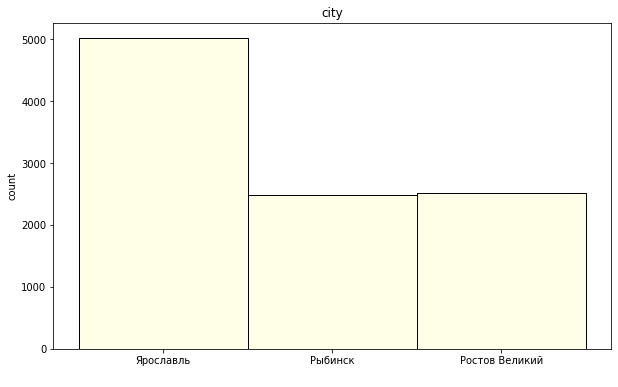

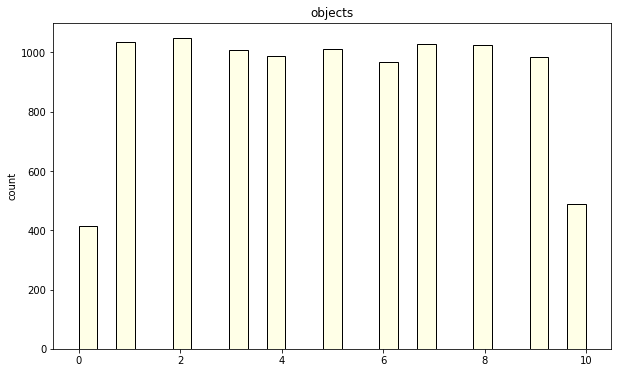

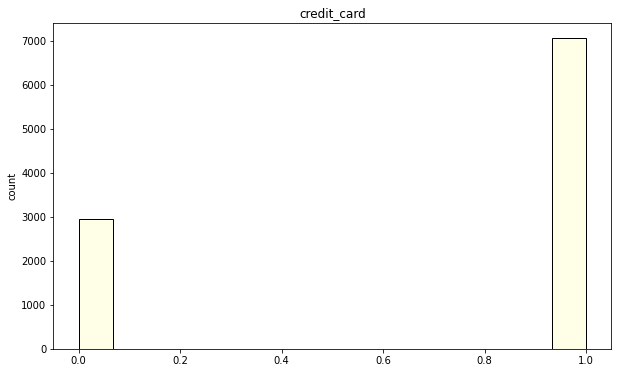

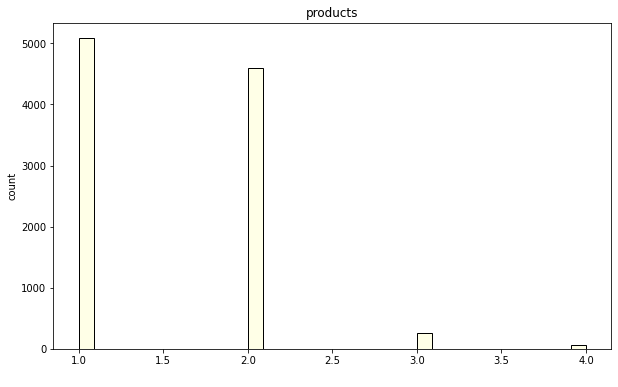

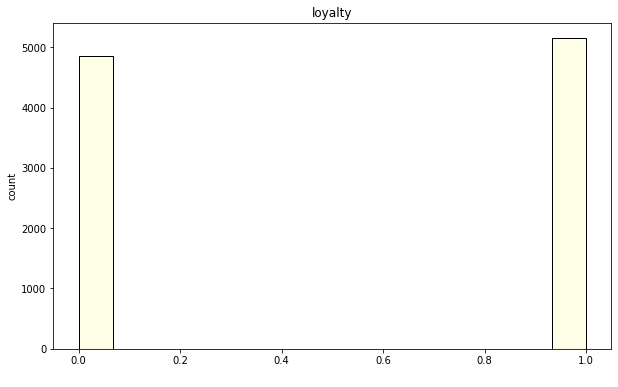

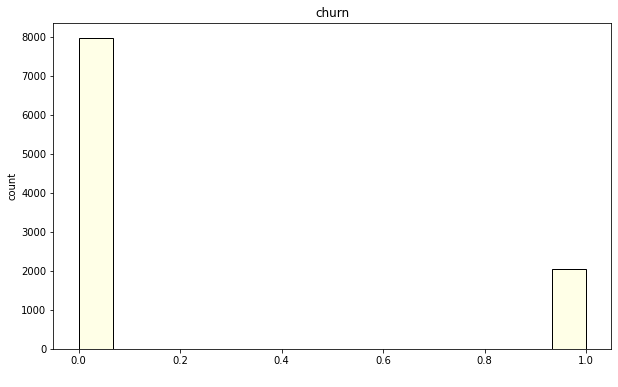

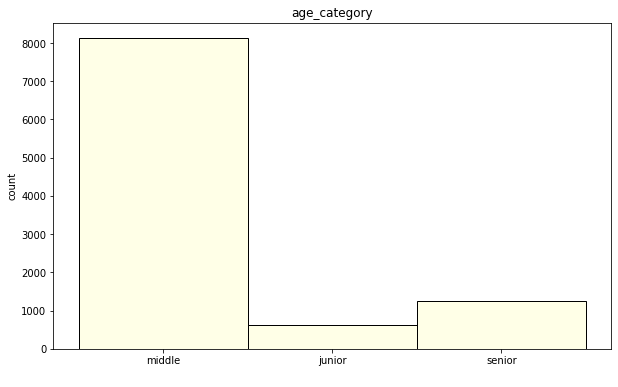

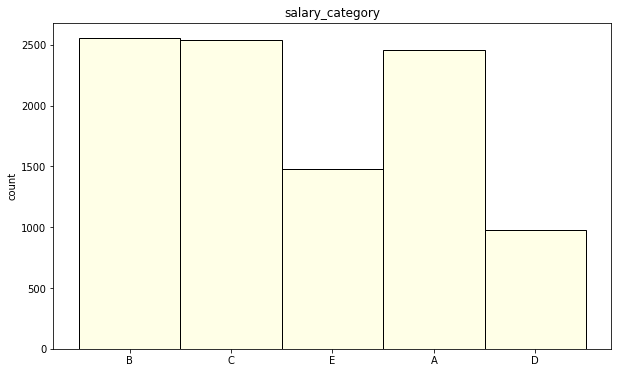

In [18]:
data_to_plt = data[[
    'gender', 'city', 'objects', 'credit_card', 'products', 'loyalty', 'churn', 'age_category', 'salary_category'
]]

for i in data_to_plt.columns:
        plt.figure(figsize=(10, 6))
        sns.histplot(x=i, data=data, color='lightyellow')
        plt.title(i)
        plt.xlabel(' ')
        plt.ylabel('count')
        plt.show()

Можно видеть, что распределение по полу, активности, и количеству объектов в собственности примерно равномерное (за исключением количества клиентов с 1 и 10 объектами в последнем параметре - их значительно меньше, чем остальных, около 4%). В Рыбинске и Ростове клиентов примерно равное количество, но в Ярославле приблизительно вдвое больше. Клиентов с кредитной картой примерно вдвое больше, чем без. Чуть больше половины клиентов пользуются одним продуктом, около 45% - двумя. 3 и 4 - менее 5%. 
Людей в возрасте от 25 до 45 около 80%, старше 45 - 13%. Младше 25 - меньше 10%.
Клиентов с зарплатами категорий А, B и С (от 50к до 100к, от 100к до 150к и больше 150к соответственно) примерно поровну - по 25%. Клиентов категории  E (от 30к до 50к) около 15%,  категории D (до 30к) - около 10%. 
#Судя по степени красивости чисел (каждые 50к - 25%, данные специально подбирали так.
Наконец, оставшихся - чуть меньше 80%, ушедших - около 20%.

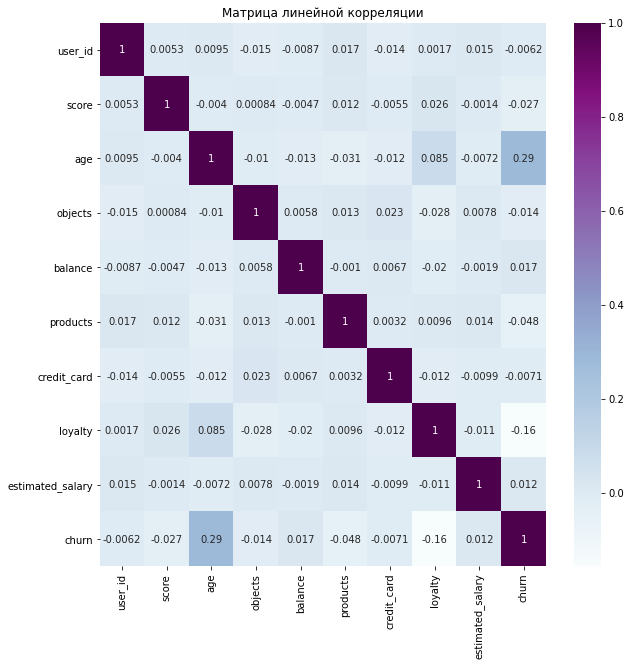

In [19]:
plt.figure(figsize = (10,10))
sns.heatmap(data.corr(), cmap='BuPu', annot=True)
plt.title('Матрица линейной корреляции')
plt.show()

Коэффициент корреляции везде <0.3 - связь очень слабая. Однако можно отметить связь churn и age, а также loyalty и age - их парный коэффициент корреляции больше остальных и достигает по меньшей мере десятых долей.

#### Вывод: 
Cильнее всего проявляется связь между "параметром ухода" и возрастом, а также "параметром ухода" и активностью.  Тем не менее, коэффициент корреляции для всех пар меньше 0.3 => связь очень слабая.

Можно видеть, что распределение по полу, активности, и количеству объектов в собственности примерно равномерное (за исключением количества клиентов с 1 и 10 объектами в последнем параметре - их значительно меньше, чем остальных, около 4%). В Рыбинске и Ростове клиентов примерно равное количество, но в Ярославле приблизительно вдвое больше. Клиентов с кредитной картой примерно вдвое больше, чем без. Чуть больше половины клиентов пользуются одним продуктом, около 45% - двумя. 3 и 4 - менее 5%. 
Людей в возрасте от 25 до 45 около 80%, старше 45 - 13%. Младше 25 - меньше 10%.
Клиентов с зарплатами категорий А, B и С (от 50к до 100к, от 100к до 150к и больше 150к соответственно) примерно поровну - по 25%. Клиентов категории  E (от 30к до 50к) около 15%,  категории D (до 30к) - около 10%. 
Наконец, оставшихся - чуть меньше 80%, ушедших - около 20%.

### Анализ оттока
Разобьём имеющийся датасет на две таблицы - с ушедшими клиентами (data_out) и оставшимися (data_rest).

In [20]:
data_out = data.query('churn==1')
data_out

,user_id,score,city,gender,age,objects,balance,products,credit_card,loyalty,estimated_salary,churn,age_category,salary_category
0,15677338,619,Ярославль,Ж,42,2,NaN,1,1,1,101348.88,1,middle,B
2,15662040,502,Ярославль,Ж,42,8,159660.80,3,1,0,113931.57,1,middle,B
5,15616748,645,Рыбинск,М,44,8,113755.78,2,1,0,149756.71,1,middle,B
7,15698884,376,Ростов Великий,Ж,29,4,115046.74,4,1,0,119346.88,1,middle,B
16,15780188,653,Ростов Великий,М,58,1,132602.88,1,1,0,5097.67,1,senior,E
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9981,15715490,498,Ростов Великий,М,42,3,152039.70,1,1,1,53445.17,1,middle,C
9982,15810899,655,Ростов Великий,Ж,46,7,137145.12,1,1,0,115146.40,1,middle,B
9991,15812695,597,Ярославль,Ж,53,4,88381.21,1,1,0,69384.71,1,senior,C
9997,15627268,709,Ярославль,Ж,36,7,NaN,1,0,1,42085.58,1,middle,D


In [21]:
data_rest = data.query('churn==0')
data_rest

,user_id,score,city,gender,age,objects,balance,products,credit_card,loyalty,estimated_salary,churn,age_category,salary_category
1,15690047,608,Рыбинск,Ж,41,1,83807.86,1,0,1,112542.58,0,middle,B
3,15744090,699,Ярославль,Ж,39,1,NaN,2,0,0,93826.63,0,middle,C
4,15780624,850,Рыбинск,Ж,43,2,125510.82,1,1,1,79084.10,0,middle,C
6,15635267,822,Ярославль,М,50,7,NaN,2,1,1,10062.80,0,middle,E
8,15835101,501,Ярославль,М,44,4,142051.07,2,0,1,74940.50,0,middle,C
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9993,15612002,644,Ярославль,М,28,7,155060.41,1,1,0,29179.52,0,middle,E
9994,15762030,800,Ярославль,Ж,29,2,NaN,2,0,0,167773.55,0,middle,A
9995,15648965,771,Ярославль,М,39,5,NaN,2,1,0,96270.64,0,middle,C
9996,15612628,516,Ярославль,М,35,10,57369.61,1,1,1,101699.77,0,middle,B


In [22]:
#Фунцкия для добавления чисел на график в центре столбика
def addlabels_t(x,y):
    for i in range(len(x)):
        plt.text(i, y[i], y[i], ha = 'center')

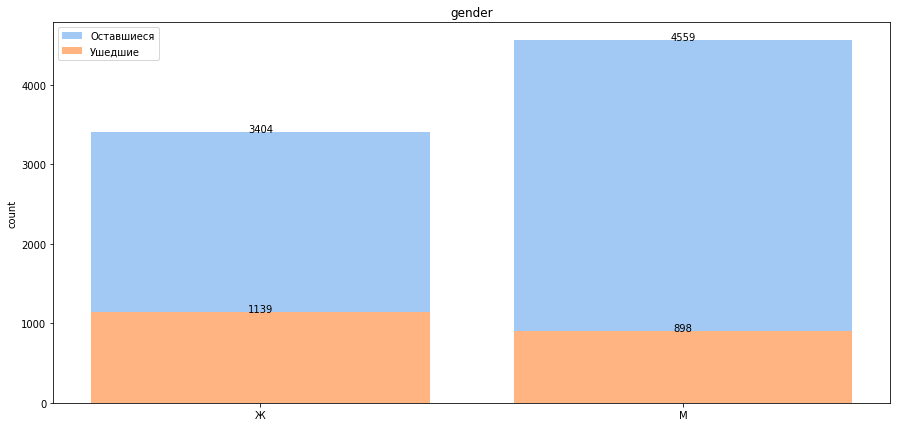

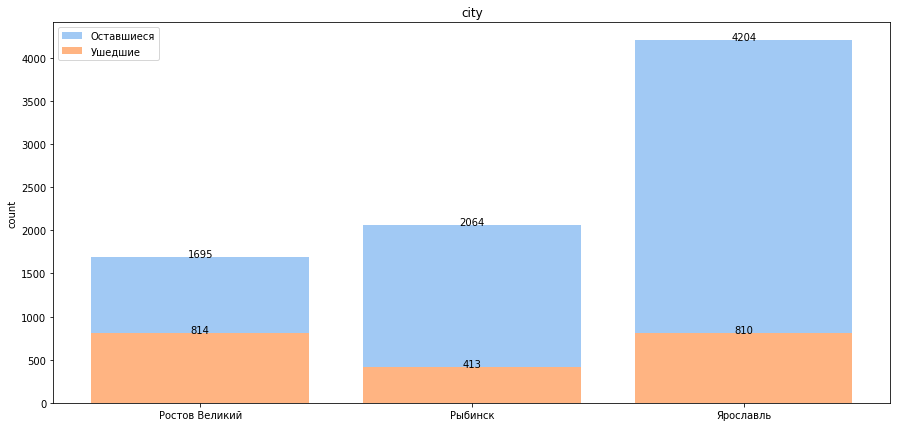

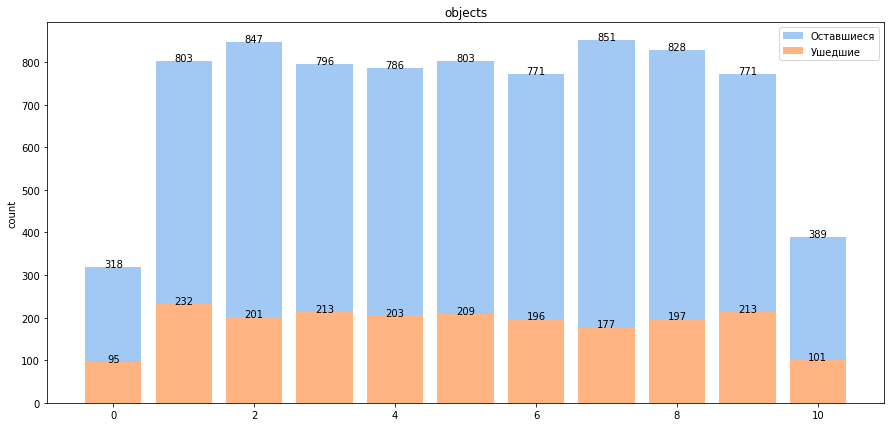

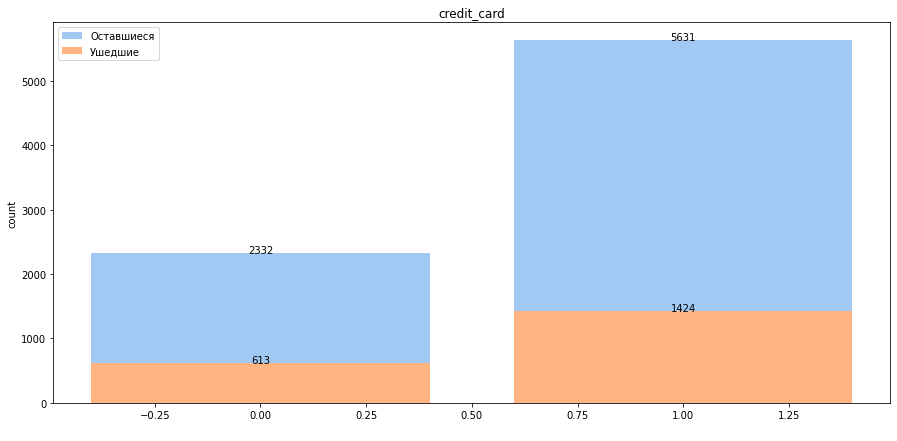

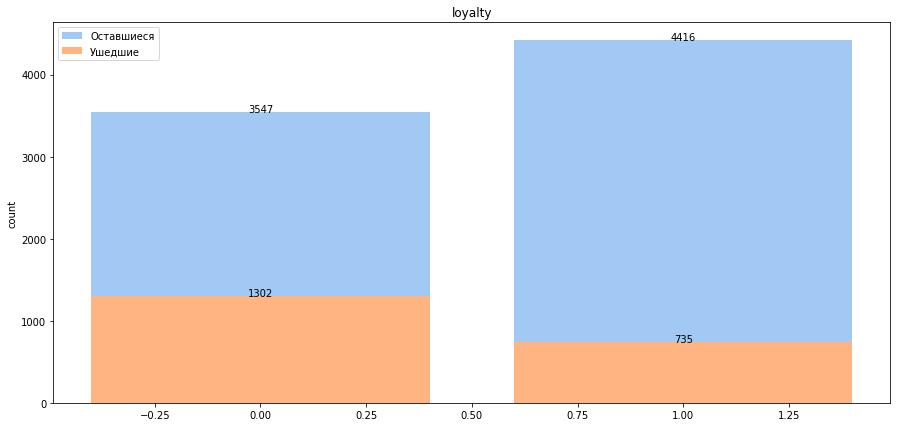

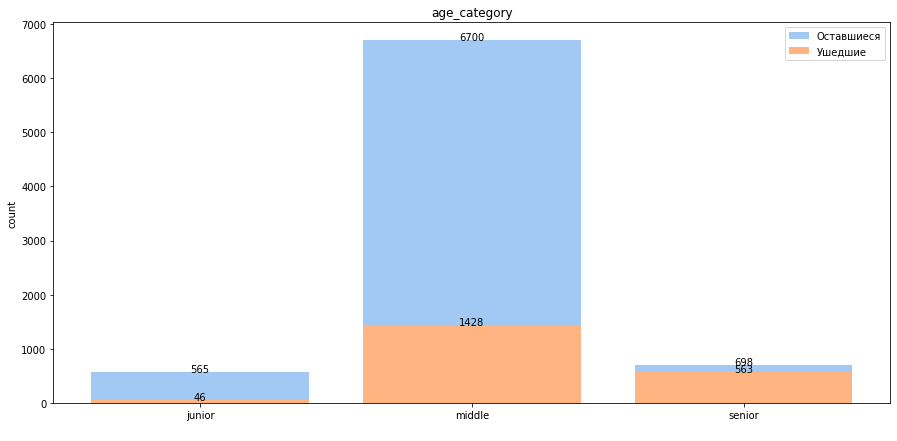

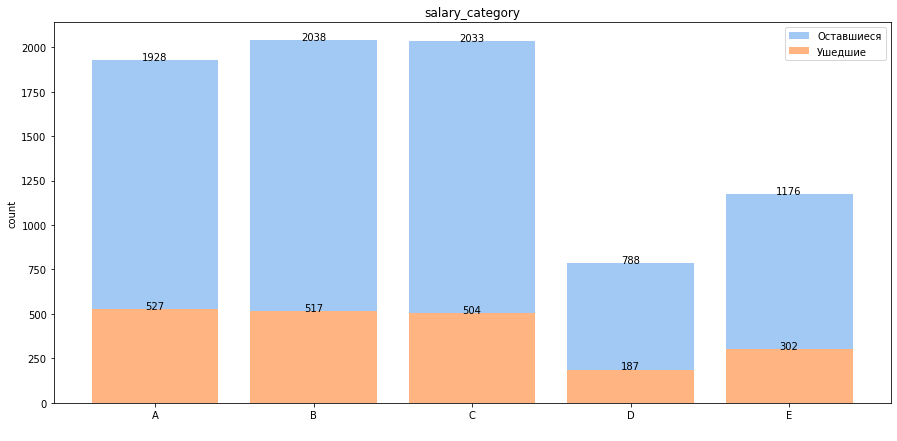

In [23]:
#Построим столбчатые диаграммы для обоих типов клиентов
data_out_to_plt = data_out[['gender', 'city', 'objects', 'credit_card', 'loyalty', 'age_category', 'salary_category']]
data_rest_to_plt = data_rest[['gender', 'city', 'objects', 'credit_card', 'loyalty', 'age_category', 'salary_category']]
for k in data_out_to_plt.columns:
    plt.figure(figsize=(15, 7))
    
    table_out = data_out.pivot_table(index=k,values='user_id',aggfunc='count').reset_index()
    table_rest = data_rest.pivot_table(index=k,values='user_id',aggfunc='count').reset_index()
    
    plt.bar(x=table_rest[k], height=table_rest['user_id'], label = 'Оставшиеся')
    plt.bar(x=table_out[k], height=table_out['user_id'], label = 'Ушедшие') 
    addlabels_t(table_out[k], table_out['user_id'])
    addlabels_t(table_rest[k], table_rest['user_id'])

    
    plt.title(k)
    plt.legend()
    plt.xlabel(' ')
    plt.ylabel('count')
    plt.show()

Посчитаем ещё проценты для удобства анализа:

In [24]:
#Фунцкия для добавления чисел на график в центре столбика
def addlabels_c(x,y):
    for i in range(len(x)):
        plt.text(i, y[i]//2, y[i], ha = 'center')

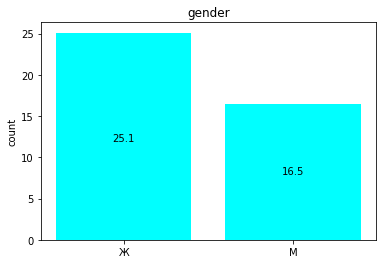

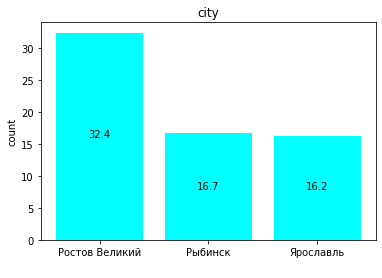

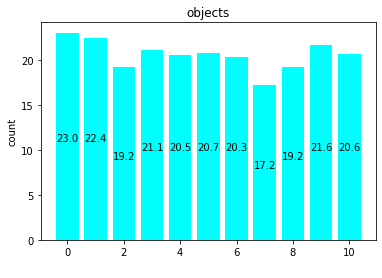

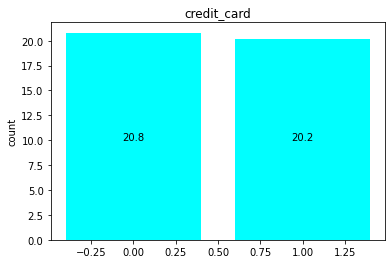

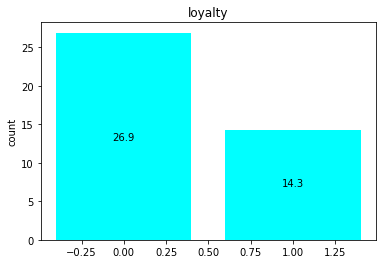

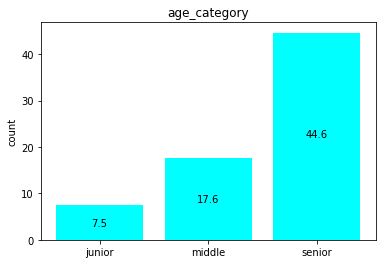

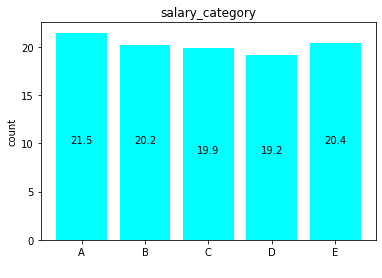

In [25]:
for k in data_out_to_plt.columns:
    
    
    table_out = data_out.pivot_table(index=k,values='user_id',aggfunc='count').reset_index()
    table_rest = data_rest.pivot_table(index=k,values='user_id',aggfunc='count').reset_index()
    full_table= table_out.merge(table_rest, on=k, how='outer')
    #Рассчитываем отношение ушедших к сумме ушедших и оставшихся
    full_table['percent']=round(full_table['user_id_x']*100/(full_table['user_id_x']+full_table['user_id_y']),1)
    plt.bar(x=full_table[k], height=full_table['percent'], color='cyan')
    addlabels_c(full_table[k], full_table['percent'])

    
    plt.title(k)
    plt.xlabel(' ')
    plt.ylabel('count')
    plt.show()
    

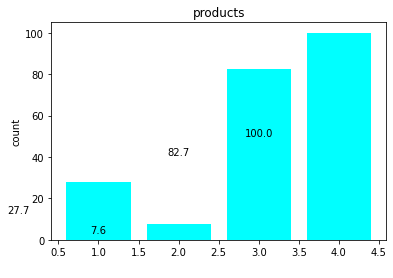

In [26]:
# С product  всё почему-то пошло не так - его посчитаю отдельно.
table_out = data_out.pivot_table(index='products',values='user_id',aggfunc='count').reset_index()
table_rest = data_rest.pivot_table(index='products',values='user_id',aggfunc='count').reset_index()
full_table= table_out.merge(table_rest, on='products', how='outer')
#Рассчитываем отношение ушедших к сумме ушедших и оставшихся
full_table
#А, вот почему всё пошло не так. У них нет оставшихся.
full_table=full_table.fillna(0)
full_table['percent']=round(full_table['user_id_x']*100/(full_table['user_id_x']+full_table['user_id_y']),1)
plt.bar(x=full_table['products'], height=full_table['percent'], color='cyan')
addlabels_c(full_table['products'], full_table['percent'])

    
plt.title('products')
plt.xlabel(' ')
plt.ylabel('count')
plt.show()
#А числа всё равно съезжают...

#### Вывод
Можно видеть, что  число ушедших клиентов почти не зависит количества объектов, находящихся во владении клиента, его зарплаты и наличия кредитной карточки. Чуть заметнее различия для активности (ушло 26.9% неактивных клиентов и 14.3% - активных), пола (ушло 25.1% женщин и 16.5% мужчин) и географии (В Ростове Великом ушло 32,4% клиентов, в Рыбинске - 16.7, в Ярославле - 16.2%). Ярче всего проявляется различия в возрасте (ушло 44.6% клиентов старше 45 лет, 17.6% - от 25 до  45 лет, и всего 7.5% - от 18 до 25 лет) и в количестве используемых продуктов (ушли все клиенты, использующие 4 продукта, 82.7%- использующих 3 продукта, 7.6%  - 2 продукта и 27.7% - 1 продукт)

## Портреты
### Портрет клиента, склонного уходить из банка
- Женщины
- Старше 45
- Из Ростова Великого
- Использовал(а) больше 2 продуктов
- Не проявлял(а) активность в последнее время
### Портрет клиента, склонного уходить из банка
- Мужчины
- От 18 до 25 лет
- Из Ярославля
- Использовал(а) два продукта
- Последнее время проявлял(а) активность

##  Формулировка гипотез
1.Гипотеза равенства дохода между теми клиентами, которые ушли и теми, которые остались.
- H0: Между доходом клиентов, ушедших из банка и клиентов, оставшихся в нём, нет  статистически значимой разницы
- H1: Между доходом клиентов, ушедших из банка и клиентов, оставшихся в нём, есть статистически значимая разница.
2.Гипотеза равенства баллов кредитного скоринга между теми клиентами, которые ушли и теми, которые остались.
- H0: Между кол-вом баллов кредитного скоринга клиентов, ушедших из банка и клиентов, оставшихся в нём, нет  статистически значимой разницы
- H1: Между кол-вом баллов кредитного скоринга клиентов, ушедших из банка и клиентов, оставшихся в нём, есть статистически значимая разница.

In [27]:
# Функция для проведения теста Манна-Уитни
def mw_test(df1, df2, alpha):
    results =st.mannwhitneyu(df1, df2) # ваш код
    print('p-значение: ', results.pvalue)
    if results.pvalue < alpha:
        print('Отвергаем нулевую гипотезу: разница статистически значима')
    else:
        print(
        'Не получилось отвергнуть нулевую гипотезу, вывод о различии сделать нельзя'
    ) 

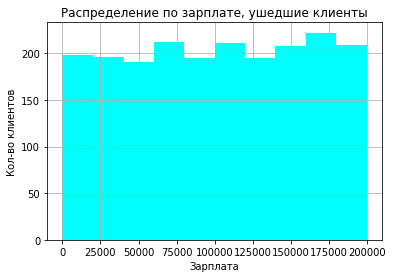

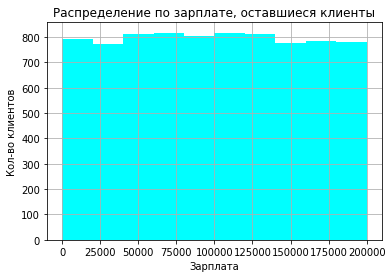

p-значение:  0.22705150930153783
Не получилось отвергнуть нулевую гипотезу, вывод о различии сделать нельзя


In [28]:
# Проверим первую гипотезу. Изучим распределения.
data_out['estimated_salary'].hist(color='cyan')
plt.title('Распределение по зарплате, ушедшие клиенты')
plt.xlabel('Зарплата')
plt.ylabel('Кол-во клиентов')
plt.show()

data_rest['estimated_salary'].hist(color='cyan')
plt.title('Распределение по зарплате, оставшиеся клиенты')
plt.xlabel('Зарплата')
plt.ylabel('Кол-во клиентов')
plt.show()
mw_test(data_out['estimated_salary'], data_rest['estimated_salary'], 0.05)

In [29]:
## Формы распределения похожи - можем использовать тест Манна-Уитни.
mw_test(data_out['estimated_salary'], data_rest['estimated_salary'], 0.05)

p-значение:  0.22705150930153783
Не получилось отвергнуть нулевую гипотезу, вывод о различии сделать нельзя


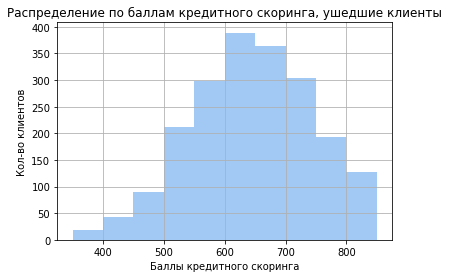

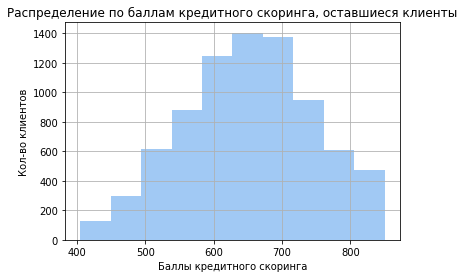

p-значение:  0.01986866117272834
Отвергаем нулевую гипотезу: разница статистически значима


In [30]:
# Проверим  вторую гипотезу. 
data_out['score'].hist()
plt.title('Распределение по баллам кредитного скоринга, ушедшие клиенты')
plt.xlabel('Баллы кредитного скоринга')
plt.ylabel('Кол-во клиентов')
plt.show()

data_rest['score'].hist()
plt.title('Распределение по баллам кредитного скоринга, оставшиеся клиенты')
plt.xlabel('Баллы кредитного скоринга')
plt.ylabel('Кол-во клиентов')
plt.show()
## Формы распределения похожи - можем использовать тест Манна-Уитни.
mw_test(data_out['score'], data_rest['score'], 0.05)

### Вывод:
Итак,  между доходом клиентов, ушедших из банка и клиентов, оставшихся в нём, нет статистически значимой разницы, а между  их кол-вом баллов кредитного скоринга статистически значимая разница есть.

## Выводы и рекомендации

 В результате выполнения работы был изучен и проанализирован массив данных от Метанпромбанка об их клиентах.
### В результате предобработки данных выявлено:
- Столбцы переименованы в соответствии со стилем snake
- Выбросов и аномальных данных не обнаружено
- Дубликатов не обнаружено
- Обнаружены и обработаны пропуски в столбце Balance. Пропуск: 

  * Чаще всего встречается у тех, кто пользуется 2 продуктами (примерно в 2.5 раза больше, чем у пользующихся 1 продуктом, и больше чем в 10  раз, чем у пользующихся тремя)
  * Примерно в 2.5 раза чаще у клиентов с кредитной карточкой, чем без. 
  * Чаще всего у клиентов около 30 лет
  * Оставшихся клиентов с пропуском в балансе в 6 раз больше, чем ушедших.
  * Значимых различий в возрасте, поле,  активности и количеству объектов в собственности клиентов не обнаружено
  * В Ярославле встречается в 2 раза чаще, чем в Рыбинске. Интересно, что в Ростове при этом пропусков нет вообще.
  
  Предположительно пропуск в cтолбце balance означает нулевой дебетовый счёт. Это может быть связано, например, с тем, что клиент пользуется только кредитной картой/выплачивает банку кредит или ипотеку. Принято решение оставить пропуски как есть, т.к точную причину их появления установить не удаётся. Имеет смысл связаться с заказчиком и уточнить этот момент.
  
  
- Проведена дополнительная категоризация. Клиентам от 18 (минимальный возраст) до 25 присвоена категория junior, от 26 до 45 - middle, более 45 - senior.

### В результате исследовательского анализа данных выявлено:
Число ушедших клиентов почти не зависит от:  
- Количества объектов, находящихся во владении клиента, 
- Зарплаты  клиента
- Наличия кредитной карточки у клиента

Чуть заметнее различия для:
- Активности (ушло 26.9% неактивных клиентов и 14.3% - активных) 
- Пола (ушло 25.1% женщин и 16.5% мужчин)
- Географии (В Ростове Великом ушло 32,4% клиентов, в Рыбинске - 16.7, в Ярославле - 16.2%). 

Ярче всего проявляется различия в:
- Возрасте (ушло 44.6% клиентов старше 45 лет, 17.6% - от 25 до  45 лет, и всего 7.5% - от 18 до 25 лет)
- Количестве используемых продуктов (ушли все клиенты, использующие 4 продукта, 82.7%- использующих 3 продукта, 7.6%  - 2 продукта и 27.7% - 1 продукт)

### В результате статистического анализа данных:
Проверены гипотезы о равенстве дохода между ушедшими и оставшимися клиентами и о равенстве баллов кредитного скоринга между ними. 

Выявлено, что между доходом клиентов, ушедших из банка и клиентов, оставшихся в нём, нет статистически значимой разницы, а между  их кол-вом баллов кредитного скоринга статистически значимая разница есть.

### Портреты:
Портрет клиента, склонного уходить из банка
- Женщины
- Старше 45
- Из Ростова Великого
- Использовал(а) больше 2 продуктов
- Не проявлял(а) активность в последнее время

 Портрет клиента, склонного уходить из банка
- Мужчины
- От 18 до 25 лет
- Из Ярославля
- Использовал(а) два продукта
- Последнее время проявлял(а) активность

### Рекомендации:
 1. Проверить данные для столбца balance и уточнить причину пропусков.
 2. Разработать продукт, который мог бы заинтересовать уходящих клиентов, дополнительно прорекламировать его. Например, льготные условия вкладов для пенсионеров, обслуживание пенсионного счёта.
 3. Изучить, какими продуктами пользовались клиенты, у которых было более двух продуктов. Возможно, в них есть проблема, и это отпугнуло часть клиентов.